In [24]:
data = {'CSC 260': ['MAT 103', 'INF 110', 'INF 120', 'CSC 270'], 'MAT 103': ['MAT 102', 'MAT 119'], 'MAT 102': ['MAT 101'], 'MAT 101': [], 'MAT 119': ['MAT 103'], 'INF 110': [], 'INF 120': [], 'CSC 270': ['MAT 128', 'MAT 129'], 'MAT 128': ['MAT 119'], 'MAT 129': ['MAT 119']}

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from io import BytesIO

In [26]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [57]:
def generate_graph(data):
    # Initialize a directed graph and add edges based on the provided data
    G = nx.DiGraph()

    # Add edges directly from the data dictionary
    for course, prerequisites in data.items():
        G.add_edges_from((prereq, course) for prereq in prerequisites)

    # Assign a 'layer' attribute to each node based on the number of prerequisites
    for course, prerequisites in data.items():
        G.nodes[course]['subset'] = len(prerequisites)
        for prereq in prerequisites:
            G.nodes[prereq]['subset'] = G.nodes[prereq].get('subset', 0)

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.multipartite_layout(G, subset_key='subset')  # Create the top-to-bottom layout
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, 
            font_size=10, font_weight='bold', arrows=True, arrowstyle='->', arrowsize=15)
    plt.show()

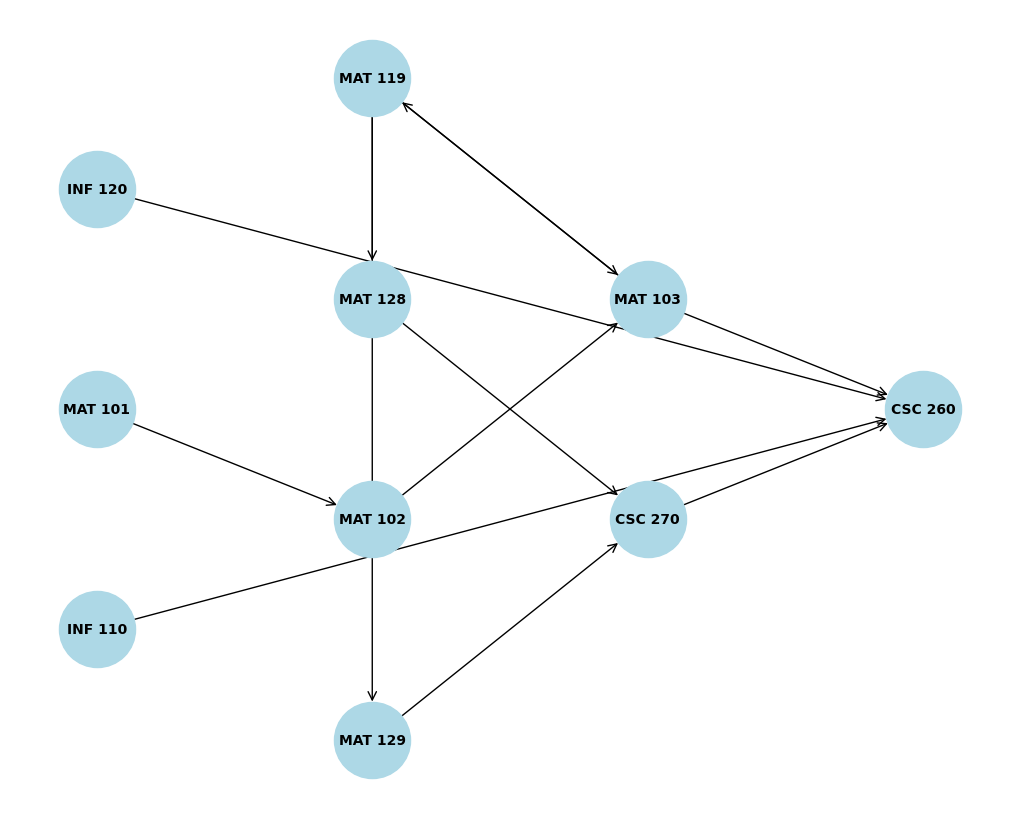

In [58]:
generate_graph(data)